In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
dataPath = '/home/danilofrp/projeto_final/data'
dataType = 'stocks'
dataTarget = 'PETR4'
frequency = 'diario'
filepath = dataPath + '/' + dataType + '/' + dataTarget + '/' + frequency + '/' + dataTarget + '.CSV'


df = pd.read_csv(filepath, delimiter=';', decimal=',',
    parse_dates=['Date'], dayfirst=True, index_col='Date')
df = df.sort_index() #csv entries begin from most recent to older dates
df['Close_r'] = np.log(df.Close/df.Close.shift(1))
print df.head()

            Close  Open  High   Low    Volume  Quantity   Close_r
Date                                                             
2000-03-01   3.00  2.91  3.00  2.91  48664200  83184000       NaN
2000-03-02   2.91  2.99  3.04  2.91  47375900  80664000 -0.030459
2000-03-03   3.06  2.93  3.06  2.92  24559400  41304000  0.050262
2000-03-08   3.13  3.04  3.14  2.98  15910700  26056000  0.022618
2000-03-09   3.24  3.16  3.27  3.16  42882100  67488000  0.034540


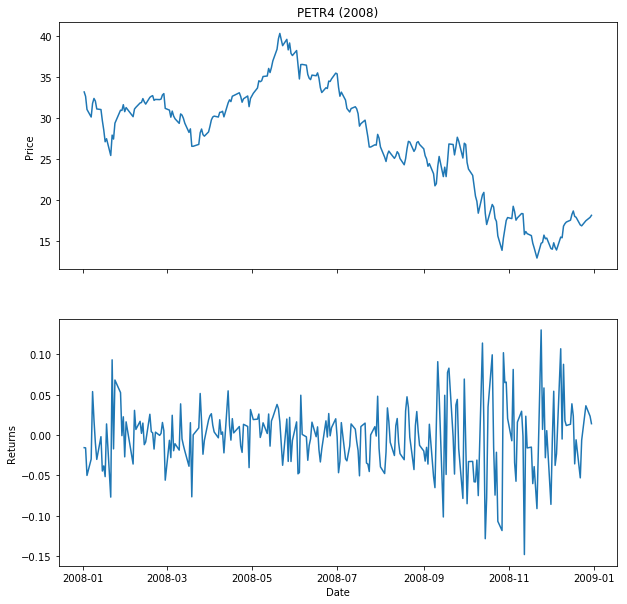

In [15]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10), nrows = 2, ncols = 1, sharex = True)

plot_data = df['2008']
plt.xlabel('Date')
ax[0].set_title('PETR4 (2008)')
ax[0].set_ylabel('Price')
ax[0].plot(plot_data['Close'])

ax[1].set_ylabel('Returns')
ax[1].plot(plot_data['Close_r'])

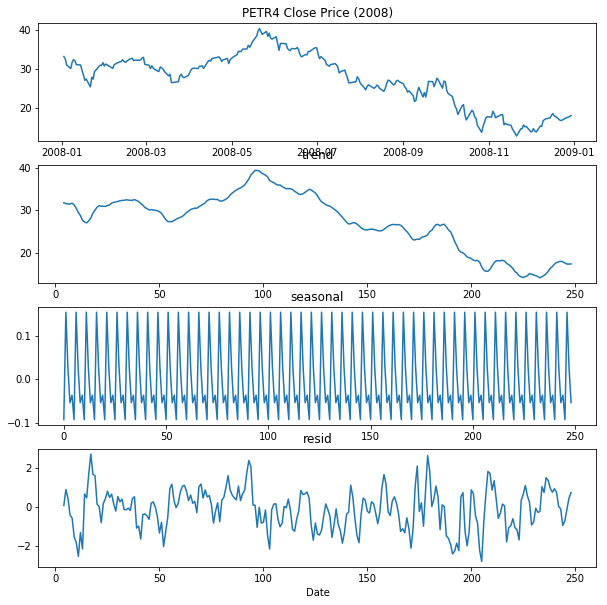

In [16]:
%matplotlib inline
result = seasonal_decompose(df['Close']['2008'].values, model='additive', freq=5, two_sided=False)

fig, ax = plt.subplots(figsize=(10,10), nrows = 4, ncols = 1)

plot_data = df['2008']
plt.xlabel('Date')
ax[0].set_title('PETR4 Close Price (2008)')
ax[0].plot(plot_data['Close'])

ax[1].set_title('trend')
ax[1].plot(result.trend)

ax[2].set_title('seasonal')
ax[2].plot(result.seasonal)

ax[3].set_title('resid')
ax[3].plot(result.resid)